# Байесовская статистика
## Задание BS.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

* Задача 1 —  100 баллов

---

In [1]:
# Bot check

# HW_ID: ds_bs6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
from scipy.special import beta, betaln
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

---
### Задача 1.

<font color="red"><b></b></font>

Рассмотрим некоторую реализацию дерева Поля при следующих предположениях и ограничениях.
* Дерево ограничено глубиной `tree_depth`. 
* Множество элементарных исходов $\mathrm{\Omega} = B = [a, b]$ также ограничено. 
* Пусть на каждом уровне деление текущего множества $B_\varepsilon$ происходит пополам. 

Тогда для описания всех множеств $\{B_\varepsilon\}$ достаточно задать 
* "центр" `tree_center`$=с=\frac{a+b}{2}$ множества $B$ 
* и его размах `tree_range`$=\delta$,

В таком случае верхнее множество представимо в виде $B=[c-\delta/2, c+\delta/2]$. Каждое отдельное множество $B_\varepsilon$ имеет длину $|B_\varepsilon| = \delta / 2^{|\varepsilon|}$, причём если для любых двух путей $\varepsilon_0, \varepsilon_1$ выполнено $|\varepsilon_0| = |\varepsilon_1|$, то $|B_{\varepsilon_0}| = |B_{\varepsilon_1}|$, то есть отрезки одного уровня имеют одинаковую длину.

В такой реализации нужно тщательно выбирать множество $B$: оно должно почти полностью покрывать область высокой плотности. Для этого можно или предварительно сдвинуть дерево, основываясь на предэкспериментальных данных, или выбрать большой размах `tree_range`. Второй способ, однако, может потребовать большой глубины дерева для получения корректных результатов.

Выбор априорных значений уже написан за вас в функции `_get_alphas`. Обоснование этого выбора можно найти в <a href="https://arxiv.org/pdf/0910.5060.pdf">оригинальной статье</a>. Допишите реализацию класса.

In [3]:
class PolyaTree:
    def __init__(self, tree_depth=20, tree_range=8, tree_center=0):
        """
        :param tree_depth: максимально возможная глубина дерева
        :param tree_range, tree_center: задают стартовое множество
                B=[-tree_range/2 + tree_center, tree_range/2 + tree_center]
        """

        self.tree_depth = tree_depth
        self.tree_range = tree_range
        self.tree_center = tree_center

        self.buckets = self._get_buckets()
        self.alphas_0_prior, self.alphas_1_prior = self._get_alphas()

        self.alphas_0 = self.alphas_0_prior
        self.alphas_1 = self.alphas_1_prior

    def test_equality(self, sample1, sample2):
        """
        Returns the *log* Bayes factor in favor of H0: P1 = P2.
        """
        n1_L, n1_R = self._drop_sample(sample1)
        n2_L, n2_R = self._drop_sample(sample2)

        log_bf = 0.0
        for j in range(len(self.buckets)):
            a0, a1 = self.alphas_0_prior[j], self.alphas_1_prior[j]
            n1l, n1r = n1_L[j], n1_R[j]
            n2l, n2r = n2_L[j], n2_R[j]

            log_num = betaln(a0, a1) + betaln(a0 + n1l + n2l, a1 + n1r + n2r)
            log_den = betaln(a0 + n1l, a1 + n1r) + betaln(a0 + n2l, a1 + n2r)

            log_bf += (log_num - log_den)

        return log_bf

    #####################################################################################################################

    def _get_alpha(self, level, c=1):
        """
        Расчитывает априорные параметры на каждом уровне дерева

        :param level: текущая глубина
        :param c: константа
        :return: априорные параметры для заданной глубины
        """

        return c * (level**2)

    def _get_alphas(self):
        """
        Генерирует априорные параметры для всего дерева.
        На каждом уровне априорный параметр определятся как cm^2 согласно статье.
        На выходе отдает два массива, параметры alpha_0 и alpha_1 для всех theta.
        В массиве соответствие узлам сверху-вниз и слева направо.

        :return: априорные параметры
        """

        level = 1
        repetitions = 1

        alphas_0 = []
        alphas_1 = []

        while level <= self.tree_depth:
            alpha = [self._get_alpha(level)] * repetitions
            alphas_0.extend(alpha)
            alphas_1.extend(alpha)

            level += 1
            repetitions <<= 1

        alphas_0 = np.array(alphas_0)
        alphas_1 = np.array(alphas_1)

        return alphas_0, alphas_1

    def _drop_sample(self, sample):
        N = 2**self.tree_depth - 1
        counts_left  = [0]*N
        counts_right = [0]*N
        buckets = self._get_buckets()

        for x in sample:
            local_idx = 0
            for level in range(self.tree_depth):
                offset = 2**level - 1
                b_idx  = offset + local_idx
                left, right = buckets[b_idx]

                if x < right:
                    counts_left[b_idx] += 1
                    local_idx = 2*local_idx
                else:
                    counts_right[b_idx] += 1
                    local_idx = 2*local_idx + 1

        return counts_left, counts_right

    def _get_buckets(self):
        """
        Создает бакеты B_e, |e| <= tree_depth, описывающие дерево, по правиалам:

        1) B = [c - delta/2; c + delta/2] -- наше ограничение
        2) B_e0 + B_e1 = B_e и они не пересекаются -- определение дерева
        3) |B_e| = delta / 2^{|e|} -- наше ограничение, деление множества происходит пополам
        """

        buckets = []
        for j in range(self.tree_depth):
            for i in range(2**j):
                buckets.append(
                    [
                        self.tree_center - self.tree_range / 2 + self.tree_range / 2**j * i,
                        self.tree_center - self.tree_range / 2 + self.tree_range / 2**j * (i + 1),
                    ]
                )
        return buckets

Исследуйте сходимость метода относительно апостериорных характеристик при различных выбранных параметрах. Рассмотрите, как влияют:
- размер выборки;
- верность гипотезы;
- выбор множества $B$;
- сравниваемые истинные распределения;
- глубина дерева.

1) Размер выборки

  0%|          | 0/10 [00:00<?, ?it/s]

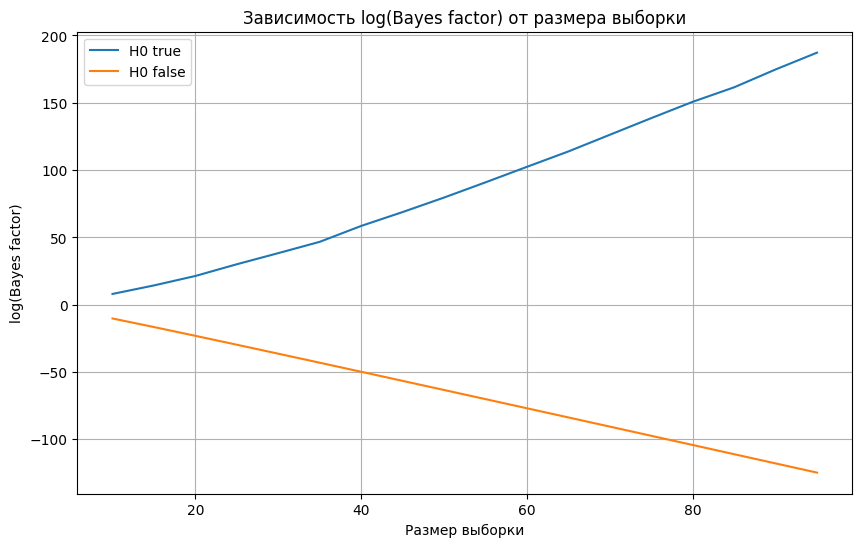

In [4]:
theta_1 = 0
theta_2 = 20
tree_center = 0
tree_range = 30
tree_depth = 15
n_iter = 10
sizes = np.arange(10, 100, 5)

bf_values_h0 = np.zeros(len(sizes))
bf_values_h1 = np.zeros(len(sizes))

for _ in tqdm(range(n_iter)):
    for i, size in enumerate(sizes):
        sample_1 = np.random.normal(theta_1, 1, size)
        sample_2 = np.random.normal(theta_1, 1, size)
        tree = PolyaTree(tree_depth, tree_range, tree_center)
        bf_h0 = tree.test_equality(sample_1, sample_2)
        bf_values_h0[i] += bf_h0

        sample_1 = np.random.normal(theta_1, 1, size)
        sample_2 = np.random.normal(theta_2, 1, size)
        tree = PolyaTree(tree_depth, tree_range, tree_center)
        bf_h1 = tree.test_equality(sample_1, sample_2)
        bf_values_h1[i] += bf_h1

bf_values_h0 /= n_iter
bf_values_h1 /= n_iter

plt.figure(figsize=(10, 6))
plt.plot(sizes, bf_values_h0, label="H0 true")
plt.plot(sizes, bf_values_h1, label="H0 false")
plt.xlabel("Размер выборки")
plt.ylabel("log(Bayes factor)")
plt.grid()

plt.title("Зависимость log(Bayes factor) от размера выборки")
plt.legend()
plt.show()

3) выбор множества B

  0%|          | 0/10 [00:00<?, ?it/s]

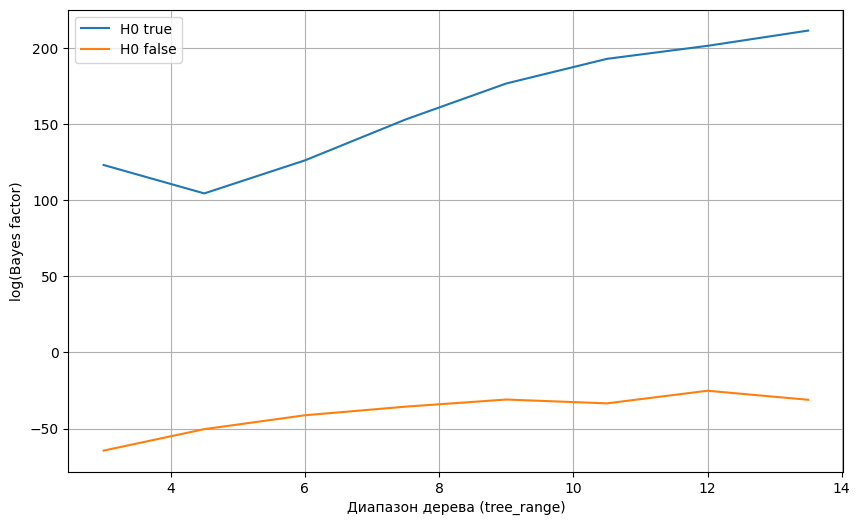

In [5]:
theta_1 = 0
theta_2 = 3
tree_center = (theta_1 + theta_2) / 2
tree_depth = 15
n_iter = 10
size = 100
tree_ranges = np.arange(tree_center * 2, tree_center * 10, tree_center)

bf_values_h0 = np.zeros(len(tree_ranges))
bf_values_h1 = np.zeros(len(tree_ranges))

for _ in tqdm(range(n_iter)):
    for i, tree_range in enumerate(tree_ranges):
        # H0: одинаковые распределения
        sample_1 = np.random.normal(theta_1, 1, size)
        sample_2 = np.random.normal(theta_1, 1, size)
        tree = PolyaTree(tree_depth, tree_range, tree_center)
        bf_h0 = tree.test_equality(sample_1, sample_2)
        bf_values_h0[i] += bf_h0

        # H1: разные распределения
        sample_1 = np.random.normal(theta_1, 1, size)
        sample_2 = np.random.normal(theta_2, 1, size)
        tree = PolyaTree(tree_depth, tree_range, tree_center)
        bf_h1 = tree.test_equality(sample_1, sample_2)
        bf_values_h1[i] += bf_h1

bf_values_h0 /= n_iter
bf_values_h1 /= n_iter

plt.figure(figsize=(10, 6))

plt.plot(tree_ranges, bf_values_h0, label="H0 true")
plt.plot(tree_ranges, bf_values_h1, label="H0 false")
plt.xlabel("Диапазон дерева (tree_range)")
plt.ylabel("log(Bayes factor)")
plt.grid()
plt.legend()
plt.show()

4) Сравниваемые истинные распределения

Построим зависимость от случая когда выборки из одного распределения, до случая когда выборки из разных распределений.

  0%|          | 0/10 [00:00<?, ?it/s]

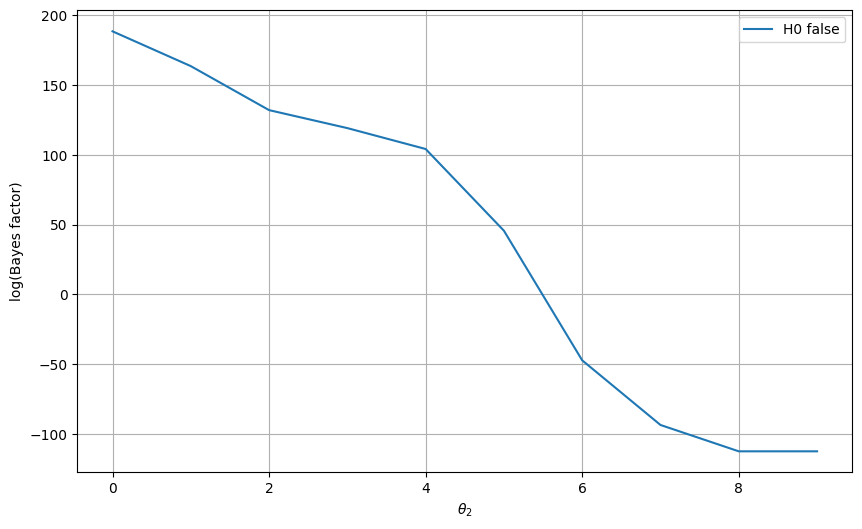

In [6]:
theta_1 = 0
theta_2 = 10
tree_center = (theta_1 + theta_2) / 2
tree_range = 20
tree_depth = 15
n_iter = 10
size = 100
theta_2_values = np.arange(theta_1, theta_2, (theta_2 - theta_1) / 10)

bf_values_h1 = np.zeros(len(theta_2_values))

for _ in tqdm(range(n_iter)):
    for i, theta_2 in enumerate(theta_2_values):
        sample_1 = np.random.normal(theta_1, 1, size)
        sample_2 = np.random.normal(theta_2, 1, size)
        tree = PolyaTree(tree_depth, tree_range, tree_center)
        bf_h1 = tree.test_equality(sample_1, sample_2)
        bf_values_h1[i] += bf_h1

bf_values_h1 /= n_iter

plt.figure(figsize=(10, 6))

plt.plot(theta_2_values, bf_values_h1, label="H0 false")
plt.xlabel(r"$\theta_2$")
plt.ylabel("log(Bayes factor)")
plt.grid()
plt.legend()
plt.show()

5) Зависимость от глубины.

  0%|          | 0/10 [00:00<?, ?it/s]

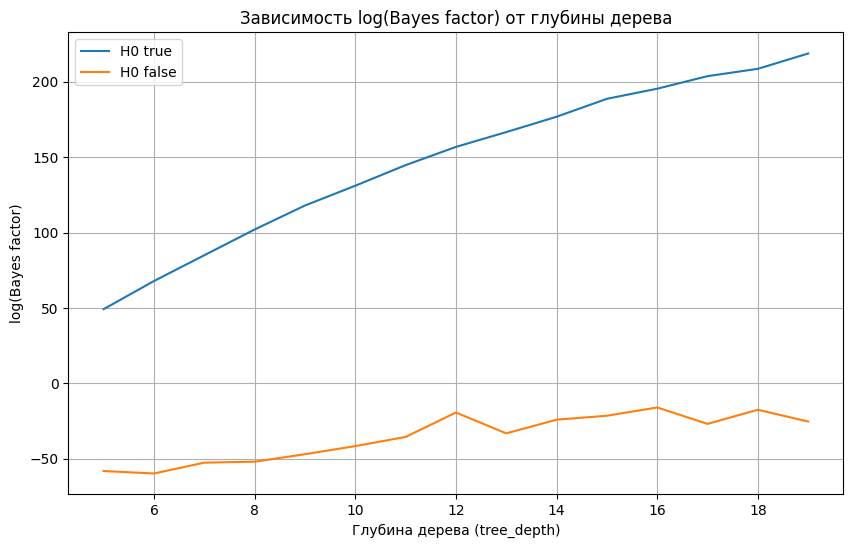

In [7]:
theta_1 = 0
theta_2 = 3
tree_center = (theta_1 + theta_2) / 2
tree_range = 10
n_iter = 10
size = 100

tree_depths = np.arange(5, 20, 1)
bf_values_h0 = np.zeros(len(tree_depths))
bf_values_h1 = np.zeros(len(tree_depths))

for _ in tqdm(range(n_iter)):
    for i, tree_depth in enumerate(tree_depths):
        # H0: одинаковые распределения
        sample_1 = np.random.normal(theta_1, 1, size)
        sample_2 = np.random.normal(theta_1, 1, size)
        tree = PolyaTree(tree_depth, tree_range, tree_center)
        bf_h0 = tree.test_equality(sample_1, sample_2)
        bf_values_h0[i] += bf_h0

        # H1: разные распределения
        sample_1 = np.random.normal(theta_1, 1, size)
        sample_2 = np.random.normal(theta_2, 1, size)
        tree = PolyaTree(tree_depth, tree_range, tree_center)
        bf_h1 = tree.test_equality(sample_1, sample_2)
        bf_values_h1[i] += bf_h1

bf_values_h0 /= n_iter
bf_values_h1 /= n_iter

plt.figure(figsize=(10, 6))
plt.plot(tree_depths, bf_values_h0, label="H0 true")
plt.plot(tree_depths, bf_values_h1, label="H0 false")
plt.xlabel("Глубина дерева (tree_depth)")
plt.ylabel("log(Bayes factor)")
plt.grid()
plt.legend()
plt.title("Зависимость log(Bayes factor) от глубины дерева")
plt.show()

Сделайте выводы

**Выводы**

Мы реализовали простой вариант дерева Поля для предсказания байсовского фактора.

На основе полученных экспериментов можно сделать следующие выводы:

1) С увеличением размера выборки байсовский фактор становится больше для выборок из одного распределения, и меньше для выборок из разных распределений.
2) С увеличением размера дерева, модель начинает быть слишком уверенной в совпадении распределений, так и начинает хуже распозновать разные распределения.
3) Чем больше различий между распределениями, тем меньше получается байсовский фактор.
4) С увеличением глубины дерева, модель начинает быть слишком уверенной в совпадении распределений, так и начинает хуже распозновать разные распределения.